# Preparation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as spss
import plotly.express as px
import seaborn as sns

import random
import time 
import datetime
from time import strptime

In [2]:
insert_database_option = False
insert_prometheus_option = False
random_client=1


if random_client==1:
    normal_data_rownumber= 100000
    abnormal_data_row_number=2500
    csv_file_name= "rand1.csv"
    customer_name_list = ["RAND001"]
else:
    normal_data_rownumber= 19000
    abnormal_data_row_number=1000
    customer_name_list = ["RAND002"]
    csv_file_name= "rand2.csv"

total_row_number = normal_data_rownumber+abnormal_data_row_number*2


In [3]:
time_start,time_end = '2022-01-01 00:00:00', '2022-12-31 23:59:00'

# Continuous Distribution

## Uniform Distribution

In [4]:
gamma_list = spss.gamma.rvs(a=40000, size=normal_data_rownumber).tolist() # size specifies number of random variates, a is the shape parameter
gamma_list= [int(i) for i in gamma_list]

In [5]:
from scipy.stats import gamma
a = 48000
gamma.ppf([0.5, 0.9,0.95, 0.999], a)

array([47999.66666708, 48280.9871346 , 48360.93699236, 48679.88681264])

In [6]:
gamma_list= gamma.rvs(a, size=normal_data_rownumber)

C:\Users\Jijun Du\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

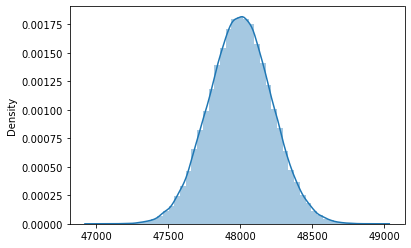

In [7]:
sns.distplot(gamma_list, kde=True)

In [8]:
uniform_list = spss.uniform.rvs(size=normal_data_rownumber, loc = 0, scale=10).tolist()
normal_list = spss.norm.rvs(size=normal_data_rownumber,loc=5,scale=1).tolist()


# gamma_list = spss.gamma.rvs(a=5, size=normal_data_rownumber).tolist() # size specifies number of random variates, a is the shape parameter
# gamma_list= [i/2 for i in gamma_list]
#exponential_list = spss.expon.rvs(scale=1,loc=45000,size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation

# Generate data for Peak download_speed
exponential_list = spss.expon.rvs(scale=1000,loc=18000,size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
exponential_list = [int(np.round(item)) for item in exponential_list]

exponential_list2 = spss.expon.rvs(scale=1000,loc=45000,size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
exponential_list2 = [int(np.round(item)) for item in exponential_list2]


poisson_list = spss.poisson.rvs(mu=3, size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation



binomial_list = spss.binom.rvs(n=10,p=0.8,size=normal_data_rownumber).tolist() # n = number of trials, p = probability of success, size = number of times to repeat the trials
bernoulli_list = spss.bernoulli.rvs(size=normal_data_rownumber,p=0.6).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list = [i*10 for i in bernoulli_list]

continuous_distribution = [uniform_list,normal_list,exponential_list2,exponential_list]
discrete_distribution = [binomial_list,poisson_list,bernoulli_list]

column_names = ["uniform","normal","exponential_list2","exponential","binomial","poisson","bernoulli"]

continuous_df = pd.DataFrame(continuous_distribution).T.round(2)
discrete_df =  pd.DataFrame(discrete_distribution).T
normal_data_df = pd.concat([continuous_df,discrete_df],axis=1)
normal_data_df.columns = column_names
normal_data_df


,uniform,normal,exponential_list2,exponential,binomial,poisson,bernoulli
0,7.68,5.17,45288.0,18476.0,8,7,10
1,7.35,5.17,45264.0,18753.0,9,3,10
2,6.06,5.93,45703.0,18475.0,6,1,10
3,0.77,4.84,45379.0,18707.0,6,3,10
4,4.10,3.81,45362.0,18224.0,7,5,10
...,...,...,...,...,...,...,...
99995,9.21,5.84,45710.0,18301.0,7,3,10
99996,3.28,3.99,45559.0,18951.0,8,4,10
99997,1.02,4.72,47832.0,22048.0,7,3,0
99998,5.17,4.74,45758.0,19428.0,7,1,0


In [9]:
uniform_list_abnormal_upper = spss.uniform.rvs(size=abnormal_data_row_number, loc = 10, scale=10).tolist()
uniform_list_abnormal_lower = spss.uniform.rvs(size=abnormal_data_row_number, loc = -10, scale=10).tolist()

uniform_abnormal= uniform_list_abnormal_upper+uniform_list_abnormal_lower

abnormal_data= [uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal]


In [72]:
abnormal_data_row_number=5000
uniform_list_abnormal = spss.uniform.rvs(size=abnormal_data_row_number, loc = 5, scale=10).tolist()
normal_list_abnormal = spss.norm.rvs(size=abnormal_data_row_number,loc=10,scale=1).tolist()

exponential_list_abnormal = spss.expon.rvs(scale=1000,loc=22000,size=abnormal_data_row_number).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
exponential_list_abnormal = [int(np.round(item)) for item in exponential_list_abnormal]

exponential_list_abnormal2 = spss.expon.rvs(scale=1000,loc=50000,size=abnormal_data_row_number).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
exponential_list_abnormal2 = [int(np.round(item)) for item in exponential_list_abnormal2]


poisson_list_abnormal = spss.poisson.rvs(mu=8, size=abnormal_data_row_number).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation



binomial_list_abnormal = spss.binom.rvs(n=15,p=0.8,size=abnormal_data_row_number).tolist() # n = number of trials, p = probability of success, size = number of times to repeat the trials
bernoulli_list_abnormal = spss.bernoulli.rvs(size=abnormal_data_row_number,p=0.9).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list_abnormal = [i*10 for i in bernoulli_list_abnormal]

continuous_distribution_abnormal = [uniform_list_abnormal,normal_list_abnormal,exponential_list_abnormal2,exponential_list_abnormal]
discrete_distribution_abnormal = [binomial_list_abnormal,poisson_list_abnormal,bernoulli_list_abnormal]

column_names = ["uniform","normal","exponential_list2","exponential","binomial","poisson","bernoulli"]

continuous_df_abnormal = pd.DataFrame(continuous_distribution_abnormal).T.round(2)
discrete_df_abnormal =  pd.DataFrame(discrete_distribution_abnormal).T
abnormal_data_df = pd.concat([continuous_df_abnormal,discrete_df_abnormal],axis=1)
abnormal_data_df.columns = column_names
abnormal_data_df.head()


,uniform,normal,exponential_list2,exponential,binomial,poisson,bernoulli
0,12.10,11.78,51289.0,23256.0,12,6,10
1,14.72,9.44,52293.0,22103.0,12,11,10
2,14.92,10.18,51343.0,22581.0,12,4,10
3,14.72,8.53,50068.0,23315.0,13,5,10
4,13.41,9.84,51268.0,23765.0,11,9,10


In [73]:
abnormal_data_df=abnormal_data_df.round(0)

In [74]:
final_data =  pd.concat([normal_data_df ,abnormal_data_df])


# Combine them together

In [75]:
final_data = final_data.sample(frac=1).reset_index(drop=True)
final_data

,uniform,normal,exponential_list2,exponential,binomial,poisson,bernoulli
0,10.00,4.89,46563.0,18743.0,8,1,10
1,6.67,5.50,45584.0,19626.0,8,4,10
2,1.86,5.18,45613.0,19231.0,6,4,0
3,7.81,4.29,45375.0,18575.0,6,0,10
4,1.80,5.35,45893.0,18818.0,8,3,10
...,...,...,...,...,...,...,...
104995,3.82,4.25,46619.0,18344.0,8,2,0
104996,0.78,4.88,45570.0,18700.0,6,3,10
104997,13.00,9.00,50430.0,24008.0,11,7,10
104998,2.71,5.05,47218.0,19595.0,7,1,0


# Transform generated Data into Gyan-core-stats format

Things need to do:

## 1. Generate 12-7 = 5 More columns


In [76]:
bernoulli_list1 = spss.bernoulli.rvs(size=total_row_number,p=0.1).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list2 = spss.bernoulli.rvs(size=total_row_number,p=0.2).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list3 = spss.bernoulli.rvs(size=total_row_number,p=0.3).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list4 = spss.bernoulli.rvs(size=total_row_number,p=0.4).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list5 = spss.bernoulli.rvs(size=total_row_number,p=0.5).tolist() # p = probability of success, size = number of times to repeat the trial

## Generate customer IDs


In [77]:
# fake 4 customer IDs

nunique_customers= len(customer_name_list)


In [78]:
mapping_list=[]
for num in range(nunique_customers):
    new_customer =  [customer_name_list[num] for i in range(int(total_row_number/nunique_customers))]
    mapping_list.extend(new_customer)
    
assert len(mapping_list) == total_row_number

In [79]:

random.shuffle(mapping_list)


## Generate statstimestamp column

In [80]:
## generate timestamp
timestamp_list = (pd.DataFrame(columns=['NULL'],
                  index=pd.date_range(time_start, time_end,
                                      freq='5T'))
       .between_time('00:00','23:59')
       .index.strftime('%Y-%m-%d %H:%M:%S')
       .tolist()
)

timestamp_list = timestamp_list[:total_row_number]

In [81]:
assert len(timestamp_list) == final_data.shape[0]

In [82]:
last_data= final_data

In [83]:
last_data["bernoulli_list1"] =bernoulli_list1
last_data["bernoulli_list2"] =bernoulli_list2
last_data["bernoulli_list3"] =bernoulli_list3
last_data["bernoulli_list4"] =bernoulli_list4
last_data["bernoulli_list5"] =bernoulli_list5
last_data["mapping_list"]=mapping_list
last_data["timestamp_list"]=timestamp_list

In [84]:
last_data

,uniform,normal,exponential_list2,exponential,binomial,poisson,bernoulli,bernoulli_list1,bernoulli_list2,bernoulli_list3,bernoulli_list4,bernoulli_list5,mapping_list,timestamp_list
0,10.00,4.89,46563.0,18743.0,8,1,10,0,0,0,1,1,RAND001,2022-01-01 00:00:00
1,6.67,5.50,45584.0,19626.0,8,4,10,0,0,0,0,0,RAND001,2022-01-01 00:05:00
2,1.86,5.18,45613.0,19231.0,6,4,0,0,0,0,1,0,RAND001,2022-01-01 00:10:00
3,7.81,4.29,45375.0,18575.0,6,0,10,0,1,0,1,0,RAND001,2022-01-01 00:15:00
4,1.80,5.35,45893.0,18818.0,8,3,10,0,0,0,0,0,RAND001,2022-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,3.82,4.25,46619.0,18344.0,8,2,0,0,0,0,0,0,RAND001,2022-12-31 13:35:00
104996,0.78,4.88,45570.0,18700.0,6,3,10,0,0,0,1,0,RAND001,2022-12-31 13:40:00
104997,13.00,9.00,50430.0,24008.0,11,7,10,0,0,0,1,0,RAND001,2022-12-31 13:45:00
104998,2.71,5.05,47218.0,19595.0,7,1,0,0,0,1,0,1,RAND001,2022-12-31 13:50:00


# Insert into Database

In [85]:
last_data.columns

Index(['uniform', 'normal', 'exponential_list2', 'exponential', 'binomial',
       'poisson', 'bernoulli', 'bernoulli_list1', 'bernoulli_list2',
       'bernoulli_list3', 'bernoulli_list4', 'bernoulli_list5', 'mapping_list',
       'timestamp_list'],
      dtype='object')

In [86]:
final_df = pd.DataFrame()

In [87]:
# total_attached_user  -> 
# cell_number
# 
final_df["client_id"] = last_data["mapping_list"]
final_df["stats_timestamp"] = last_data["timestamp_list"]
final_df["total_attached_user"] = last_data["bernoulli_list5"]
final_df["total_rejected_user"] = last_data["bernoulli_list4"]
final_df["peak_upload_speed"] = last_data["exponential_list2"]
final_df["peak_download_speed"] = last_data["exponential"]
final_df["enodeb_shutdown_count"] = last_data["bernoulli_list3"]
final_df["handover_failure_count"] = last_data["bernoulli_list2"]
final_df["bearer_active_user_count"] = last_data["bernoulli_list1"]
final_df["bearer_rejected_user_count"] = last_data["bernoulli"]
final_df["total_users"] = last_data["binomial"]
final_df["total_dropped_packets"] = last_data["poisson"]
final_df["enodeb_connected_count"] = last_data["normal"]
final_df["enodeb_connection_status"] = last_data["uniform"]


In [88]:
final_df.to_csv(csv_file_name,index=False)

## Connect with Database

In [34]:
# Initiate with Parameters
db_name = "core_stats"
col = "peak_upload_speed"


# Start Database Connection
db_connection = mysql.connector.connect(
    host="10.1.2.10",
    user="gyan",
    password="5Gaa$2022",
    database="gyan_db"
)

# Load data from database and store as pandas Dataframe
df_rand = pd.read_sql(
    'SELECT * FROM gyan_db.core_stats WHERE client_id= "BETBEL01GYN001" AND stats_timestamp>"2022-07-15"'.format(db_name), con=db_connection)



C:\Users\Jijun Du\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [36]:
df_rand.to_csv("rand_1.csv")

# Different Versions Randomized Data

C:\Users\Jijun Du\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

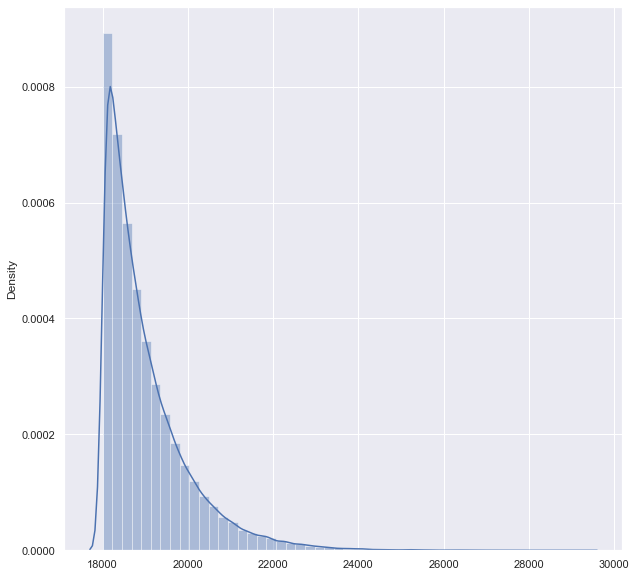

In [95]:
sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4

sns.distplot(exponential_list, kde=True)

In [94]:
df = pd.read_csv("Existing_rand_data_after_July15.csv")
df.shape

(40924, 17)

<AxesSubplot:>

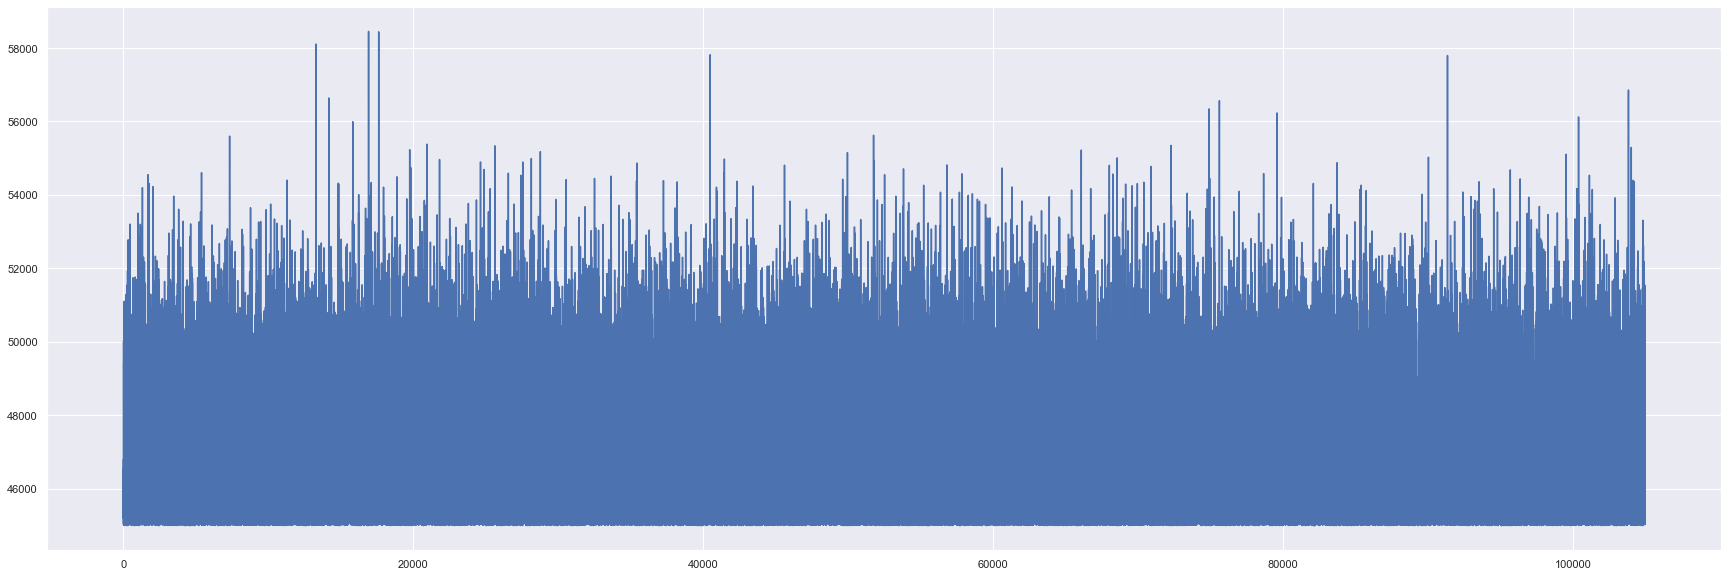

In [104]:
sns.set(rc={"figure.figsize":(30, 10)}) #width=3, #height=4

final_df.peak_upload_speed.plot()



<AxesSubplot:>

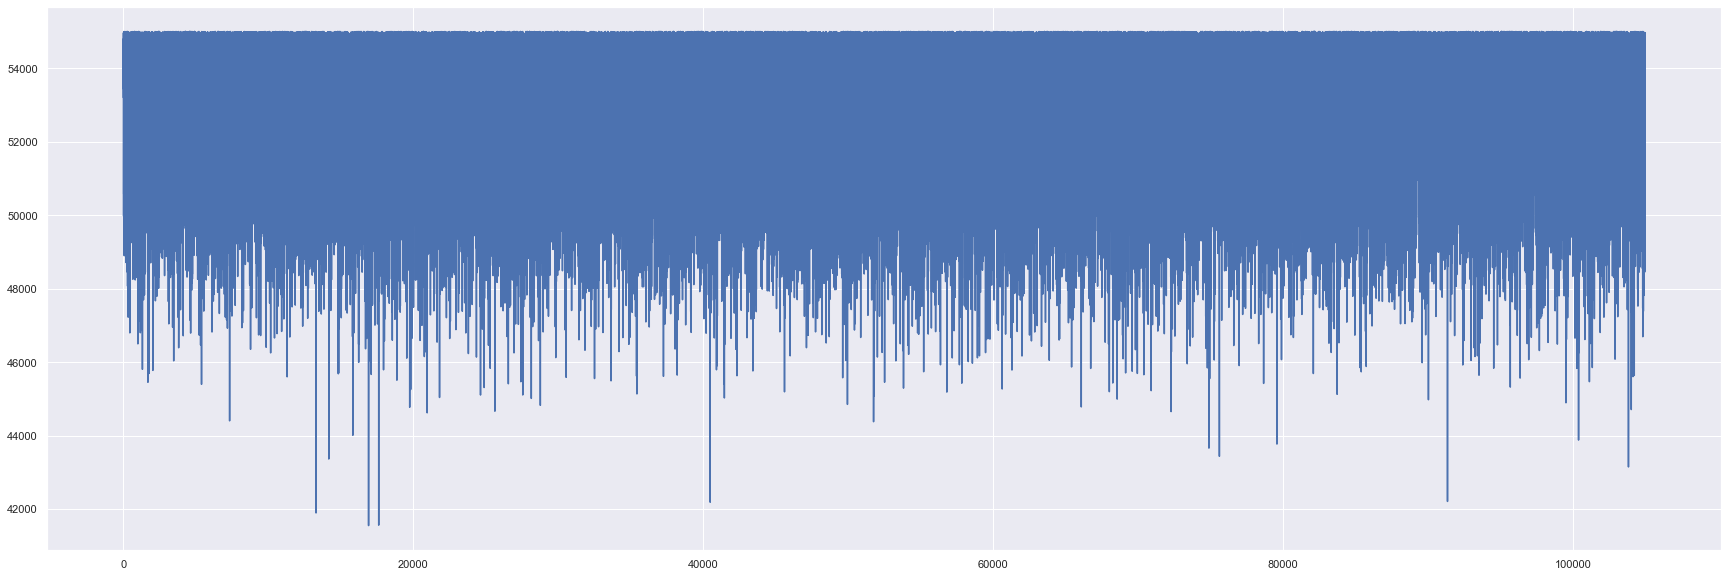

In [107]:
final_df["reverse_peak_upload_speed"]= 100000-final_df.peak_upload_speed
final_df.reverse_peak_upload_speed.plot()

In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_time_series(time, values, label):
    plt.figure(figsize=(10,6),dpi=80)
    
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

## Trend+Seasonality+Trend

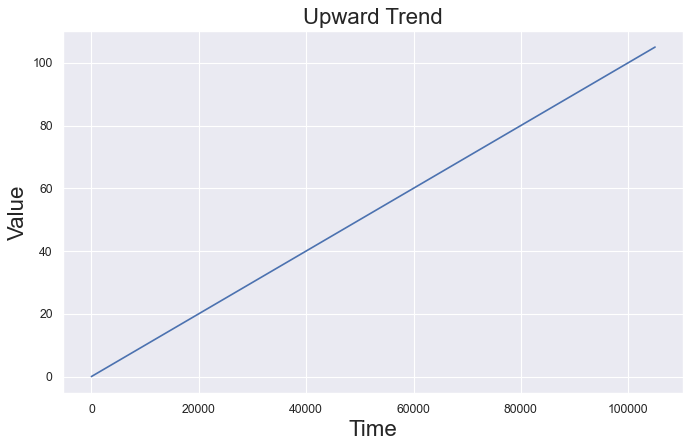

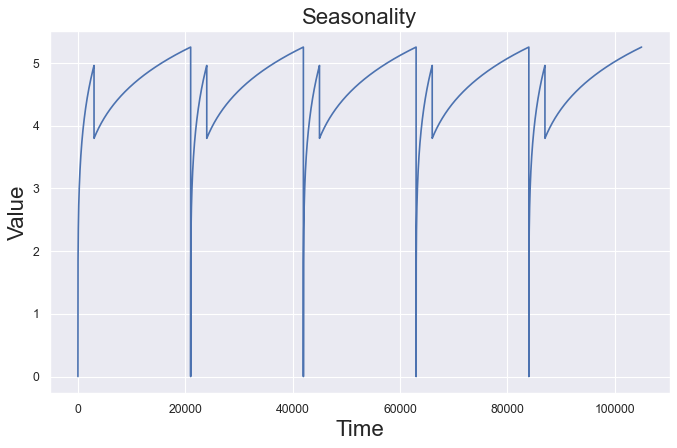

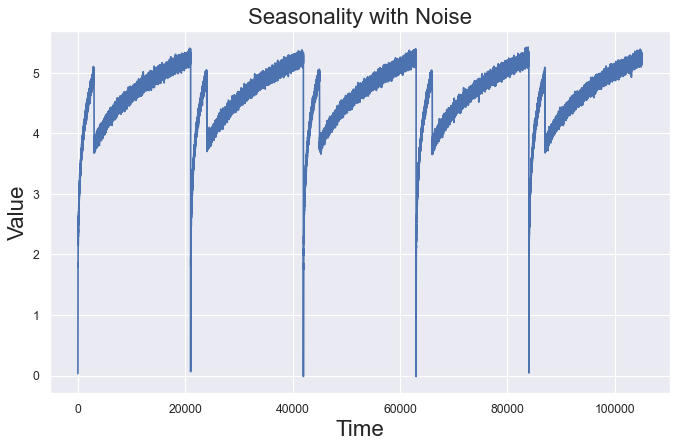

In [122]:
trend_time = np.arange(total_row_number)
trend_values = trend_time*0.001
plot_time_series(trend_time, trend_values, "Upward Trend")


# Just a random pattern
time = np.arange(total_row_number)
values = np.where(time < 3000, time**(1/5), (time)**(1/6))

# Repeat the pattern 5 times
seasonal = []
for i in range(5):
    for j in range(int(total_row_number/5)):
        seasonal.append(values[j])
# Plot
time_seasonal = np.arange(total_row_number)
plot_time_series(time_seasonal, seasonal, label="Seasonality")


noise = np.random.randn(total_row_number)*0.05
seasonal += noise
time_seasonal = np.arange(total_row_number)
plot_time_series(time_seasonal, seasonal, label="Seasonality with Noise")

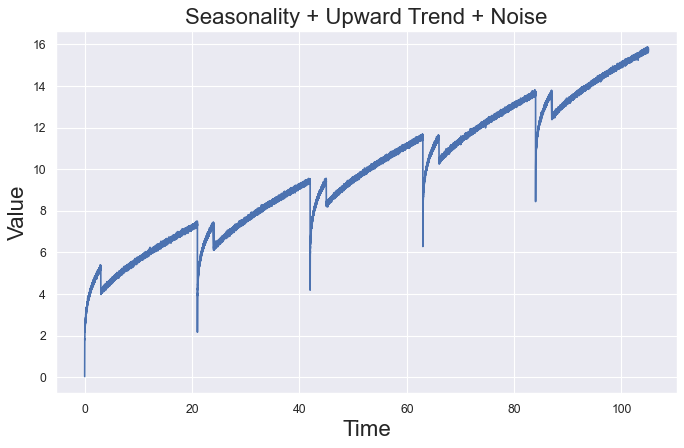

In [123]:
seasonal_upward = seasonal + np.arange(total_row_number)*0.0001

plot_time_series(trend_values, seasonal_upward, label="Seasonality + Upward Trend + Noise")
final_df_copy= final_df.copy()
final_df_copy["peak_upload_speed"]= final_df_copy["peak_upload_speed"]+seasonal_upward

<AxesSubplot:>

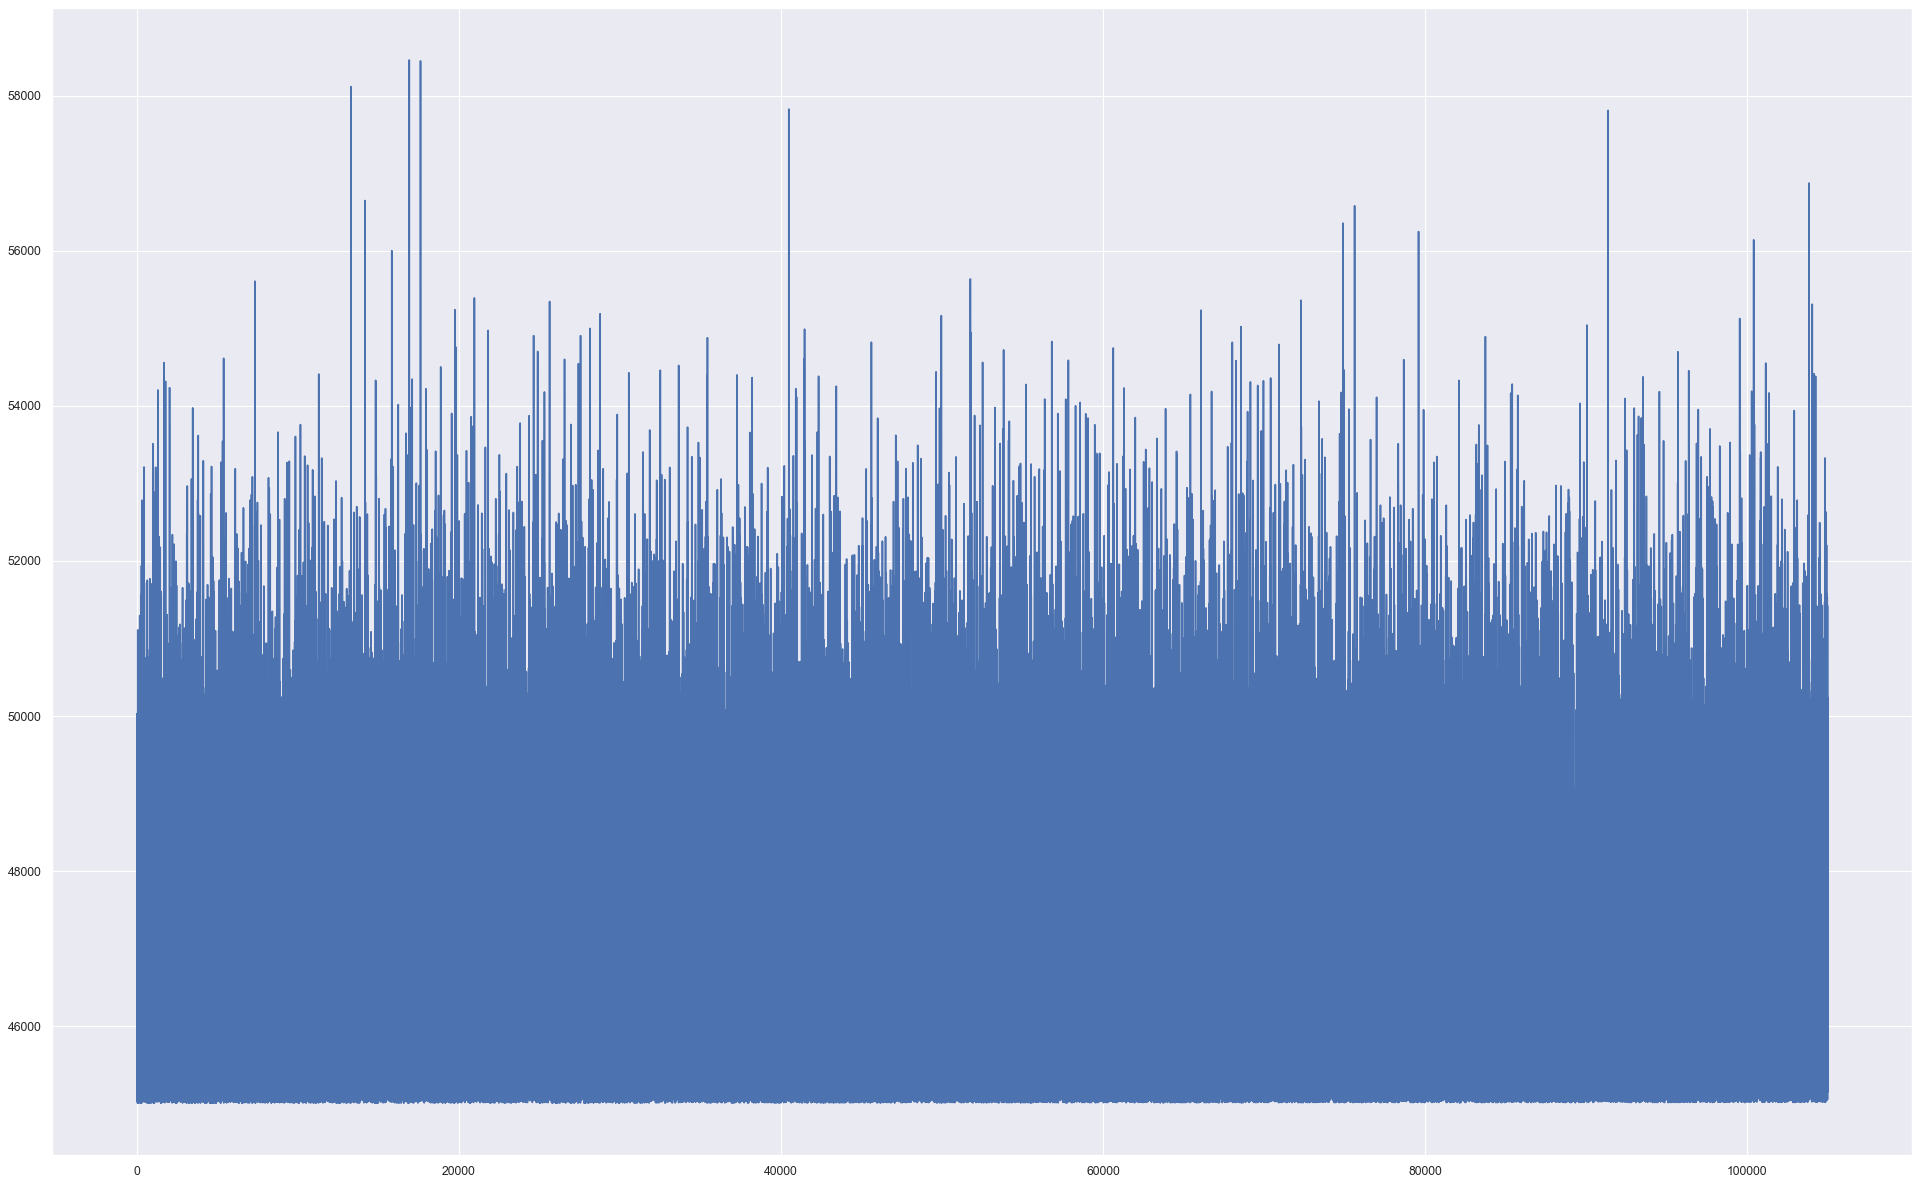

In [124]:
from matplotlib.pyplot import figure

figure(figsize=(30, 19), dpi=80)
final_df_copy["peak_upload_speed"].plot()